### Датасет фейковые новости

In [ ]:
# https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/code?datasetId=572515&sortBy=voteCount&language=Python

## Анализ тональности твитов

### Загрузка данных и модулей

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Corona_NLP_train.csv", encoding="latin-1")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Вывод случайных значений, дополнительной информации и т.д.

In [2]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
8848,12647,57599,Greece,20-03-2020,And so will every supermarket with hoards of o...,Extremely Negative
28014,31813,76765,Mumbai,04-04-2020,Worst time for global economy-\r\r\nCOVID-19 p...,Extremely Negative
38718,42517,87469,India,12-04-2020,Happy Easter Wishes Fans Sharing A Then And No...,Extremely Positive
29677,33476,78428,DMV,05-04-2020,"So, apparently these are essentials:\r\r\n\r\r...",Negative
9332,13131,58083,NaN,20-03-2020,"""Low-paid workers such as cleaners, supermarke...",Extremely Negative
6765,10564,55516,Lost,19-03-2020,TheyÂre also lying. Spoke to my local corner ...,Positive
31627,35426,80378,"USN Sixth Fleet - Rota, Spain",07-04-2020,@MarilynLavala @77MARKALLENSOVA @kay89266490 @...,Neutral
24080,27879,72831,Colorado,26-03-2020,With a boost in shopping for home essentials a...,Extremely Positive
7442,11241,56193,"Washington, D.C.",19-03-2020,"""But the collective hand-wringing over airline...",Positive
29624,33423,78375,Johannesburg,05-04-2020,@MalawiGovt This slash comes bcoz of the world...,Negative


In [3]:
df.shape

(41157, 6)

In [4]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df[["OriginalTweet", "Sentiment"]]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Визуализация

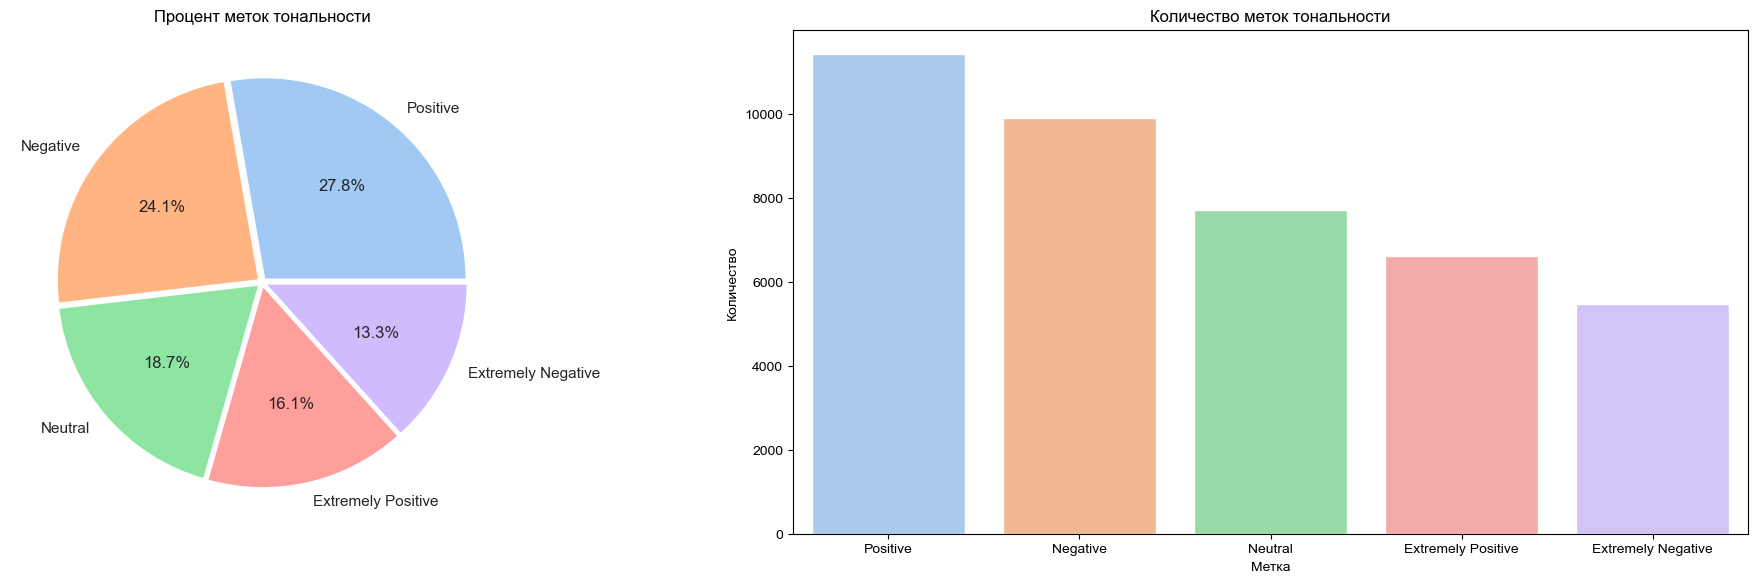

In [9]:
# подсчет значений
label_count = df["Sentiment"].value_counts()

# настройки графиков
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.set_theme(style="darkgrid", palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

# Построение pie chart
axes[0].pie(label_count.values, labels=label_count.index, autopct="%1.1f%%", colors = color, explode=explode)
axes[0].set_title("Процент меток тональности")

# Построение barplot
sns.barplot(x = label_count.index, y = label_count.values, ax=axes[1])
axes[1].set_title("Количество меток тональности")
axes[1].set_xlabel("Метка")
axes[1].set_ylabel("Количество")

plt.tight_layout()
plt.show()

### Подсчет длины сообщений

<Axes: xlabel='len', ylabel='Density'>

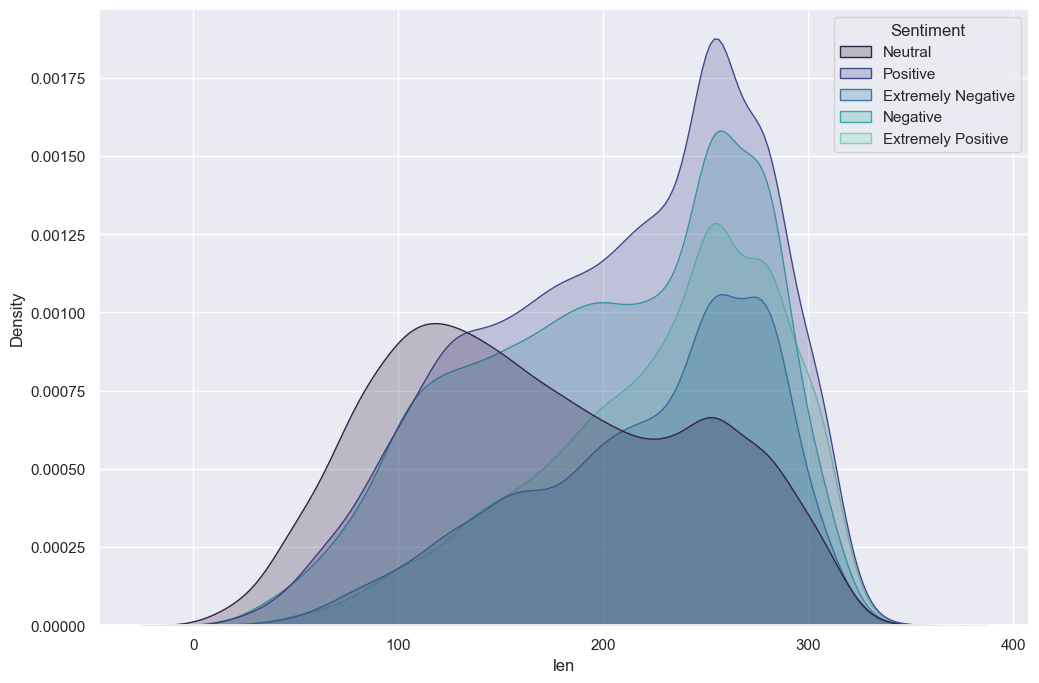

In [11]:
df["len"] = df["OriginalTweet"].apply(len)

plt.figure(figsize=(12,8))
sns.kdeplot(df, x=df['len'], fill=True, palette="mako", hue="Sentiment")

### BOW Bag of Words Мешок слов

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(df["OriginalTweet"])

In [13]:
matrix.toarray()[:10, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [17]:
cv.get_feature_names_out()[:10]

array(['00', '000', '0000', '0000009375', '0000hrs', '000162', '00042',
       '000cr', '000francs', '000ksh'], dtype=object)

In [18]:
word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())

In [20]:
print(word_matrix.shape)

(41157, 80424)


### Часто встречающиеся слова

In [25]:
df_sum = word_matrix.sum(axis=0, skipna=True)
bow = df_sum.sort_values(ascending=False)[:30]
bow = pd.DataFrame(bow, columns=["Frequency"])



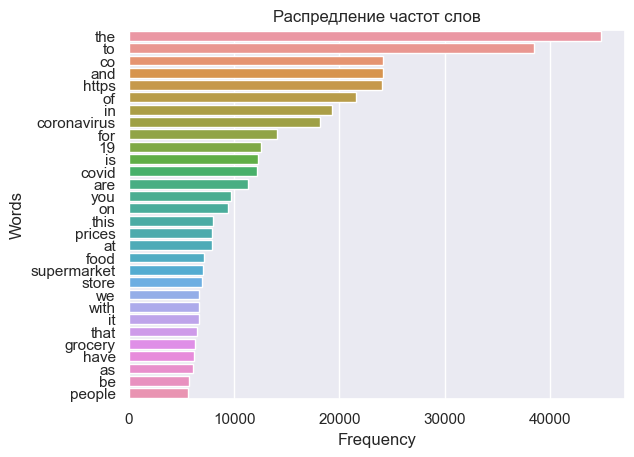

In [27]:
sns.barplot(x=bow["Frequency"], y=bow.index)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Распредление частот слов")
plt.show()

### Слова по оценке тональности

In [28]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
def create_wordcloud(text):
    text = df[df["Sentiment"] == text]
    word_text = " ".join(txt for txt in text["OriginalTweet"])

    tokens = word_tokenize(word_text)

    freq_dist = FreqDist(tokens)

    wordcloud_image = freq_dist.plot(50, cumulative=False, title="Слова по частотам", color="blue", alpha=0.7, linewidth=1.5, marker="o")

    plt.show()

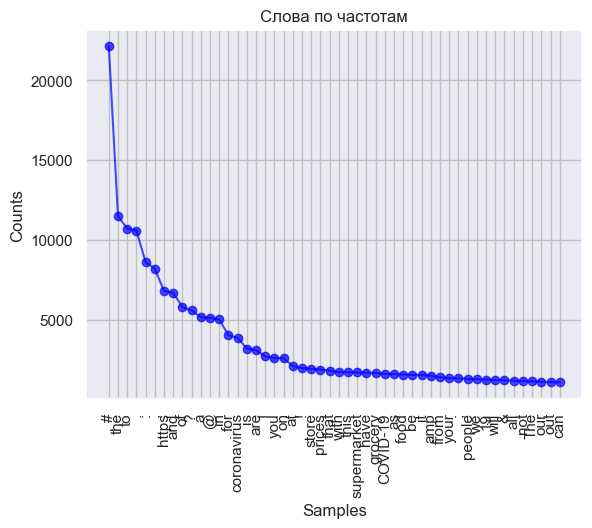

In [32]:
create_wordcloud("Positive")

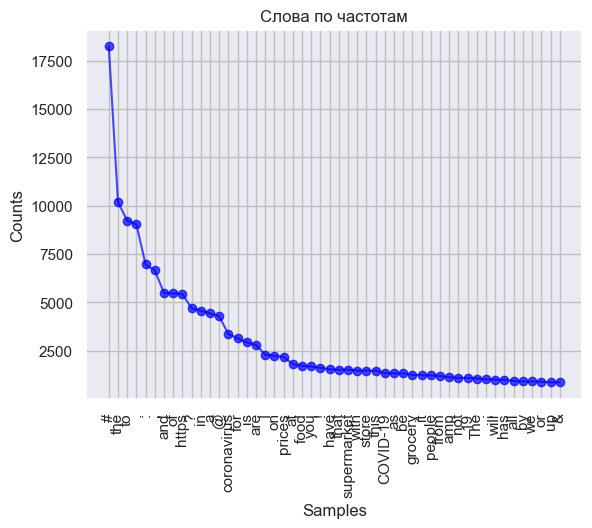

In [33]:
create_wordcloud("Negative")

### Очистка данных

In [35]:
import string
import nltk
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"pic.\S+", "", text)
    text = re.sub(r"[^a-z'A-Z]", " ", text)
    text = re.sub(r"\s+[a-z'A-Z]\s+", " ", text+ " ")
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text


In [36]:
df["new_text"] = df["OriginalTweet"].apply(clean_text)

In [39]:
df["new_text"].iloc[150]

'come trumpisanidiot trumpneedstoshutup trending real people freaked stores keep food shelf stock market control please sake county shut coronavirus'

### Стемминг

In [43]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
words = word_tokenize(df["new_text"].iloc[1])
for w in words:
    print(w, ":", ps.stem(w))

advice : advic
talk : talk
neighbours : neighbour
family : famili
exchange : exchang
phone : phone
numbers : number
create : creat
contact : contact
list : list
phone : phone
numbers : number
neighbours : neighbour
schools : school
employer : employ
chemist : chemist
set : set
online : onlin
shopping : shop
accounts : account
poss : poss
adequate : adequ
supplies : suppli
regular : regular
meds : med
order : order


In [44]:
stemmed = []
for i in range(len(df)):
    stem_list = []
    words = word_tokenize(df["new_text"].iloc[i])
    for w in words:
        stem_list.append(ps.stem(w))
    stemmed.append(stem_list)

df["Stemmed"] = stemmed


                                           OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1      advice Talk to your neighbours family to excha...            Positive   
2      Coronavirus Australia: Woolworths to give elde...            Positive   
3      My food stock is not the only one which is emp...            Positive   
4      Me, ready to go at supermarket during the #COV...  Extremely Negative   
...                                                  ...                 ...   
41152  Airline pilots offering to stock supermarket s...             Neutral   
41153  Response to complaint not provided citing COVI...  Extremely Negative   
41154  You know itÂs getting tough when @KameronWild...            Positive   
41155  Is it wrong that the smell of hand sanitizer i...             Neutral   
41156  @TartiiCat Well new/used Rift S are going for ...            Negative   

       len                             

In [46]:
df["Stemmed"] = df["Stemmed"].apply(" ".join)
df.sample(10)


,OriginalTweet,Sentiment,len,new_text,Stemmed
38251,Border closures and export restrictions are sq...,Negative,194,border closures export restrictions squeezing ...,border closur export restrict squeez suppli li...
30878,"Today, I again walked to the supermarket as ou...",Positive,292,today walked supermarket compound shuttle bus ...,today walk supermarket compound shuttl bu serv...
39109,NEW ALERT!!\r\r\nREDUCED PRICES DUE TO #corona...,Positive,318,new alert reduced prices due coronavirus onlin...,new alert reduc price due coronaviru onlinecla...
23995,"@KCCINews: Toilet paper, hand sanitizer and no...",Negative,189,toilet paper hand sanitizer eggs americans sto...,toilet paper hand sanit egg american stockpil ...
19065,How does COVID 19 or SARS CoV2 infect us Respi...,Extremely Positive,267,covid sars cov infect respiratory virus enters...,covid sar cov infect respiratori viru enter re...
6097,"moonbeamwishes Hey, Megan! We will work to kee...",Positive,228,moonbeamwishes hey megan work keep clubs stock...,moonbeamwish hey megan work keep club stock pr...
16230,Natural hand sanitizer going up on the site sh...,Extremely Positive,127,natural hand sanitizer going site shortly coro...,natur hand sanit go site shortli coronaviru co...
215,#Ulta temporarily shuts down in-#store #servic...,Negative,167,ulta temporarily shuts store services amid cor...,ulta temporarili shut store servic amid corona...
6869,Managing COVID-19 Disruption: GI Bill Benefits...,Negative,118,managing covid disruption bill benefits risk s...,manag covid disrupt bill benefit risk school t...
16728,@JeffreeStar I dont have work and staying at h...,Extremely Positive,182,dont work staying home covid family stock food...,dont work stay home covid famili stock food ho...


### Классификация и предсказание

#### Наивный Байес

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X = df["Stemmed"]
y, class_names = pd.factorize(df["Sentiment"], sort=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

pipe_1 = Pipeline([("vectorizer", TfidfVectorizer()),
("classifier", MultinomialNB(alpha=0.005))
])

pipe_1.fit(X_train, y_train)

y_pred = pipe_1.predict(X_test)
print("Accuracy Score:{:.3f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy Score:0.427
                    precision    recall  f1-score   support

Extremely Negative       0.50      0.30      0.38      1096
Extremely Positive       0.50      0.32      0.39      1325
          Negative       0.38      0.46      0.42      1983
           Neutral       0.56      0.36      0.44      1543
          Positive       0.38      0.56      0.46      2285

          accuracy                           0.43      8232
         macro avg       0.47      0.40      0.42      8232
      weighted avg       0.45      0.43      0.42      8232



#### Логистическая регрессия

In [52]:
from sklearn.linear_model import LogisticRegression
pipe_2 = Pipeline([("vectorizer", TfidfVectorizer()),
("classifire", LogisticRegression())
])

pipe_2.fit(X_train, y_train)
y_pred = pipe_2.predict(X_test)
print("Accuracy Score:{:.3f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy Score:0.579
                    precision    recall  f1-score   support

Extremely Negative       0.67      0.49      0.57      1096
Extremely Positive       0.70      0.55      0.62      1325
          Negative       0.52      0.52      0.52      1983
           Neutral       0.63      0.67      0.65      1543
          Positive       0.52      0.62      0.57      2285

          accuracy                           0.58      8232
         macro avg       0.61      0.57      0.58      8232
      weighted avg       0.59      0.58      0.58      8232



/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
